<a href="https://colab.research.google.com/github/ysoniwal/statistics/blob/main/00_statistics_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Height data to understand statistics and make some plots 
Data downloaded from [Kaggle](https://www.kaggle.com/datasets/burnoutminer/heights-and-weights-dataset?select=SOCR-HeightWeight.csv)


In [1]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/ysoniwal/statistics/main/SOCR-HeightWeight.csv")
df.drop("Index", axis = 1, inplace = True)
df.columns = ["height", "weight"]

In [2]:
df.head()

,height,weight
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


In [3]:
df.count(), len(df)

(height    25000
 weight    25000
 dtype: int64, 25000)

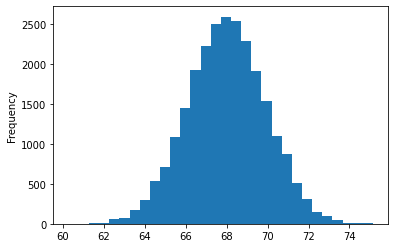

In [4]:
import matplotlib.pyplot as plt

df["height"].plot(kind = 'hist', bins = 30);

### Fitting a normal distribution to the data

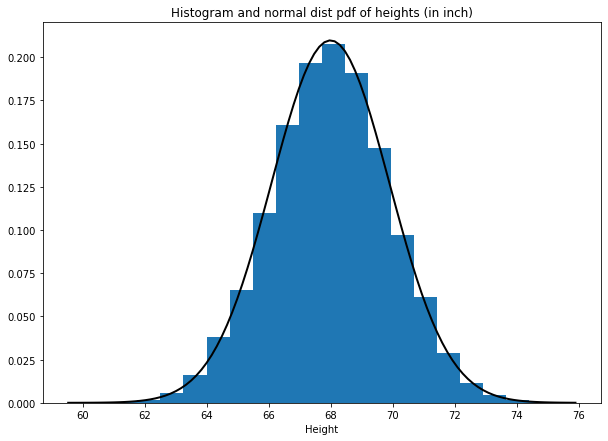

In [5]:
import numpy as np
import scipy.stats as stats

x = df["height"]

plt.figure(figsize = (10, 7))
plt.hist(x, bins = 20, density = True, label = 'histogram');

xmin, xmax = plt.xlim()

pts = np.linspace(xmin, xmax, 100)
mu, sigma = np.mean(x), np.std(x)

y = stats.norm.pdf(pts, mu, sigma)

plt.plot(pts, y, c = 'k', linewidth=2,  label = 'normal_dist')

plt.title("Histogram and normal dist pdf of heights (in inch)")
plt.xlabel("Height")
plt.show();

### Sample statistics v/s population statistics

In reality we never have population data. We just have samples and based on that we *estimate* statistics

Population mean $$\mu = \frac{∑_{i = 1}^{N}X_{i}}{N} $$
Population variance $$var(X) = \frac{∑_{i = 1}^{N}(X_{i} - \mu) ^2}{N} $$
Population standard deviation $$std(X) = \sqrt{var(X)} $$

But since we almost never have population data, we estimate these using sample data

Sample mean $$\bar{x} = \frac{∑_{i = 1}^{N}X_{i}}{N}$$
Sample variance $$var(x) = \frac{∑_{i = 1}^{N}(X_{i} - \bar{x} ) ^2}{N-1} $$
Sample standard deviation $$std(x) = \sqrt{var(X)}$$

🔑 Note: The division in sample variance is by `N-1` and not `N`. This is to avoid underestimating the population varaince

We'll do this exercise with following dataset of 25000 points. Consider these 25000 points as population and caculate population statistics using these. Then take random samples say 10, 30, 100 and 1000 and estimate sample statistics

📓: Why is sample variance underestimated when dividing by `N`?

Consider following equation: 
$$\frac{∑_{i = 1}^{N}(X_{i} - \mathbf{v} ) ^2}{N-1} $$

If we minimize this equation wrt `v` then minima occurs at $v = \bar{x} $. When we calculate this formula for $v = \bar{x}$ and $v = \mu$ then the value for $v = \bar{x}$ is always less. So to compensate this, we divide by `N-1` while taking sample variance

In [6]:
x.shape, x[:5], x[-5:]

((25000,), 0    65.78331
 1    71.51521
 2    69.39874
 3    68.21660
 4    67.78781
 Name: height, dtype: float64, 24995    69.50215
 24996    64.54826
 24997    64.69855
 24998    67.52918
 24999    68.87761
 Name: height, dtype: float64)

### Population mean, variance and standard deviation

In [7]:
m = np.mean(x)
v = np.var(x)
s = np.sqrt(v)
print(f"Population mean: {m:.2f}, variance: {v:.2f} and standard deviation: {s:.2f}")

Population mean: 67.99, variance: 3.62 and standard deviation: 1.90


### Estimate sample mean, variance and standard deviation

In [8]:
x1 = np.random.choice(x, 10)
x2 = np.random.choice(x, 30)
x3 = np.random.choice(x, 100)
x4 = np.random.choice(x, 1000)

len(x1), len(x2), len(x3), len(x4)

(10, 30, 100, 1000)

In [9]:
# Sample means - can calculate in same way as population means
m1 = np.mean(x1)
m2 = np.mean(x2)
m3 = np.mean(x3)
m4 = np.mean(x4)

## Sample variance
v1 = np.sum(np.square(x1 - m1)) / (len(x1) - 1)
v2 = np.sum(np.square(x2 - m2)) / (len(x2) - 1)
v3 = np.sum(np.square(x3 - m3)) / (len(x3) - 1)
v4 = np.sum(np.square(x4 - m4)) / (len(x4) - 1)

## Sample standard deviation
s1 = np.sqrt(v1)
s2 = np.sqrt(v2)
s3 = np.sqrt(v3)
s4 = np.sqrt(v4)

print(f"""
\t mean \t var \t std \n
x1 \t {m1:.2f} \t {v1:.2f} \t {s1:.2f} \n
x2 \t {m2:.2f} \t {v2:.2f} \t {s2:.2f} \n
x3 \t {m3:.2f} \t {v3:.2f} \t {s3:.2f} \n
x4 \t {m4:.2f} \t {v4:.2f} \t {s4:.2f} \n
-----------------------------------------
x \t {m:.2f} \t {v:.2f} \t {s:.2f}
""")


	 mean 	 var 	 std 

x1 	 68.60 	 4.27 	 2.07 

x2 	 68.46 	 2.99 	 1.73 

x3 	 67.89 	 3.71 	 1.93 

x4 	 67.92 	 3.41 	 1.85 

-----------------------------------------
x 	 67.99 	 3.62 	 1.90



### Understanding `NULL`, `Alternate` hypothesis and understanding `p-value`

Lets create and experiment where we display some items to the users. The user might click the item or not. We denote these as

if user clicks = 1

if not clicks = 0

we define CTR (Click Through Rate) as #clicks / total_items_displayed

Now we have a certains CTR in our production systems say 0.05 CTR. Now we do an experiment (say change ad slot positions or do some other modification) then the CTR might change. We want to know if the new metric occured due to a random chance or is it statistical significance. 

Let's understand all this through a step by step example

* Step 1: Create a hypothesis
* Step 2: Do the experiment and track the metrics
* Step 3: Compare the metric with the hypothesis in Step 1
* Step 4: If the data gives strong evidence that there is a difference if initial hypothesis and experiment than we reject the initial hypothise
* Step 5: If the data doesn't give us strong evidence that there is a difference in initial hypothese and experiment then we fail to reject the initial hypothesis 

We start by telling that there is no difference between experiment A (initial or current production or `control`) and experiment B (`feature` or `variant`). This is called **`NULL hypothesis`** (Step 1)

If we repeat the experiment on many people and conclude that here is a difference and that the difference didn't occured by random chance then we **`reject the NULL hypothesis`** 

Alternatively if we repeaat the experiment and coclude that there is a difference but we are not not convinced about the results, i.e. the result might also occur due to random chance, then we **`fail to reject`** the NULL hypothesis

To decide whether to reject of fail to reject the NULL hypothesis, we run the data through **`Statistical Test`**. Things required by statistical test

1. Data
2. NULL Hypothesis
3. Alternate Hypothesis

In our case **`Alternative Hypothesis`** is just the opposite of NULL hypothesis, i.e. there is a difference between experiment A and experiment B.

Statistical Test:

NULL Hypothesis: From the overall data of experiment A and experiment B, get the overall CTR. And calculate distances between overall mean and all CTRs (residuals). This is called NULL Hypothesis.

Alternate Hypothesis: From the individual data of experiment A and experiment B, get 2 separate CTRs. And calculated residuals separately for A and B. This is called Alternative Hypothesis.

If the sum of residuals with alternative hypothesis are much shorter than the sum of residuals with NULL hypothesis then we reject the NULL hypothesis because in this case having 2 separate CTRs make much more sense. 

Otherwise if the difference between sum of residual of NULL hypothesis and sum of residuals of alternative hypothesis are similar then we fail to reject the NULL hypothesis because in this case having a single CTR makes sense. Similar to saying that if we use 2 CTRs then it overfits the data and it makes sense to use one overall CTR

### `p-Values`
In above we calculated residuals (distances from mean CTRs) for NULL and alternative hypothesis. Suppose if there is some difference. We want to understand it this difference occured by random chance or not. If `p-Value` is small then we say that the difference in experiement A and B has occured by chance and we reject the NULL hypothesis. Generally used threshold is 0.05. If p-value is less than 0.05 then we say that if we do this experiment several times than only 5% of the times we would end up with wrong decisions

p-Value only tells us that whether we should reject or fail to reject the null hypothesis. It doesn't tell us *how much different* are NULL hypothesis and alternative hypothesis are?

### Calculating p-values

`p-Value` of an event = Probability of the event + Probability of events equally rare + Probability of rarer events 

Example: p-Value of getting 4 heads and 1 tails in 5 tosses of a coin

```
Events 
1. 5H in 1 way:        P = 1/32   -> Rarer event
2. 4H + 1T in 5 ways:  P = 5/32   -> Event
3. 3H + 2T in 10 ways: P = 10/32
4. 2H + 3T in 10 ways: P = 10/32
5. 1H + 4T in 5 ways:  P = 5/32   -> Equally rare event
6. 5H in 1 way:        P = 1/32   -> Rarer event

p-value of getting 4H and 1T = 5/32 + (5/32) + (1/32 + 1/32) = 12 / 32 = 0.375
```

Threhold of statistical significance = 0.05 (5%)

(p-value of our event $>$ threshold) $=>$ Fail to Reject the null hypothesis 

Null hypothesis = The coin is no different than any other coin, i.e. the coin is unbiased coin, i.e. P(H) = P(T) = 0.5

Alternate hypothesis = The coin is different than an unbiased coin, i.e. P(H) != 0.5

We Fail to Reject the Null hypothesis in this case. So we say that the coin is no different than an unbiased coin.

`Rewording this example using distribution analogies`

Null Hypothesis: The coin the no different than any other coin, i.e. the coin is unbiased, i.e. $P(H) = P(T) = 0.5 $: This is statistical distribution of the coin outcomes

Alternate Hypothesis: The coin is not unbiased. i.e., $P(H) \neq 0.5$ and $P(T) \neq 0.5$

So we toss the coin 100 times and get 60H and 40T. Then we calculate p-value of this event. If we get

p-value < 0.05 -> Reject Null hypothesis, i.e. this coin is a special coin. P(H) and P(T) $\neq$ 0.5

p-value > 0.05 -> Fail to reject the null hupothesis, i.e. the coin is no different than an unbiased coin, i.e. the coin is unbiased. It comes from same distribution than the uniform distribution. i.e. P(H) = P(T) = 0.5



```
Events associated with 100 coin tosses
(Total events) = 2^100
100H       100C0 * Total events
99H + 1T   100C1 * Total events
98H + 2T   100C2 * Total events
...
2H + 98T   100C2 * Total events
1H + 99T   100C1 * Total events
100T       100C0 * Total events
```

In [10]:
## Lets caculate 100C0 to 100C100 (since 100Ci = 100C(100-i))
from scipy.special import comb

event_probs = []
for i in range(101):
  prob = comb(100, i) * np.power(0.5, 100)
  event_probs.append(prob)

event_probs[:5], event_probs[-5:], len(event_probs), sum(event_probs)

([7.888609052210118e-31,
  7.888609052210118e-29,
  3.9048614808440084e-27,
  1.275588083742376e-25,
  3.093301103075262e-24],
 [3.093301103075262e-24,
  1.275588083742376e-25,
  3.9048614808440084e-27,
  7.888609052210118e-29,
  7.888609052210118e-31],
 101,
 1.0)

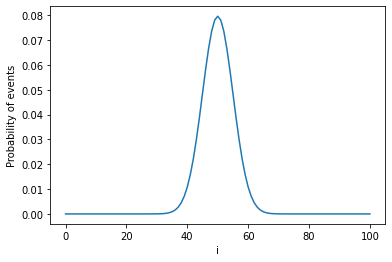

In [11]:
import matplotlib.pyplot as plt
plt.plot(range(101), event_probs)
plt.xlabel("i")
plt.ylabel("Probability of events")
plt.show()

In [12]:
def get_p_value(val, event_probs):
  return sum([prob for prob in event_probs if prob <= val])

In [13]:
## Now suppose if we get 60H and 40T. Then p-value is
val = comb(100, 60) * np.power(0.5, 100)
## Add all values in event_probs less than val
p_value = get_p_value(val, event_probs)
p_value, val

(0.05688793364098078, 0.010843866711637984)

In [14]:
# Fail to reject null hypothesis => Coin is no different than an unbiased coin

In [15]:
val = comb(100, 50) * np.power(0.5, 100)
## Add all values in event_probs less than val
p_value = get_p_value(val, event_probs)
p_value, val

(1.0, 0.07958923738717873)

In [16]:
# Fail to reject null hypothesis => Coin is no different than an unbiased coin

In [17]:
val = comb(100, 80) * np.power(0.5, 100)
p_value = get_p_value(val, event_probs)
p_value, val

(1.115908905725195e-09, 4.228163267601581e-10)

In [18]:
# p-value small => Reject null hypothesis => Coin is small

In [19]:
### Now check this for every value of heads and tails
for i in range(101): # 0 heads to 100 heads
  prob_of_event = comb(100, i) * np.power(0.5, 100)
  p_value_of_event = get_p_value(prob_of_event, event_probs)

  if p_value_of_event < 0.05: # Reject the null hypothesis
    print(f"{i}H,{100-i}T\t pvalue={p_value_of_event:.3f}\t Coin is special")
  else:
    print(f"{i}H,{100-i}T\t pvalue={p_value_of_event:.3f}\t Coin is no other than unbiased coin")

0H,100T	 pvalue=0.000	 Coin is special
1H,99T	 pvalue=0.000	 Coin is special
2H,98T	 pvalue=0.000	 Coin is special
3H,97T	 pvalue=0.000	 Coin is special
4H,96T	 pvalue=0.000	 Coin is special
5H,95T	 pvalue=0.000	 Coin is special
6H,94T	 pvalue=0.000	 Coin is special
7H,93T	 pvalue=0.000	 Coin is special
8H,92T	 pvalue=0.000	 Coin is special
9H,91T	 pvalue=0.000	 Coin is special
10H,90T	 pvalue=0.000	 Coin is special
11H,89T	 pvalue=0.000	 Coin is special
12H,88T	 pvalue=0.000	 Coin is special
13H,87T	 pvalue=0.000	 Coin is special
14H,86T	 pvalue=0.000	 Coin is special
15H,85T	 pvalue=0.000	 Coin is special
16H,84T	 pvalue=0.000	 Coin is special
17H,83T	 pvalue=0.000	 Coin is special
18H,82T	 pvalue=0.000	 Coin is special
19H,81T	 pvalue=0.000	 Coin is special
20H,80T	 pvalue=0.000	 Coin is special
21H,79T	 pvalue=0.000	 Coin is special
22H,78T	 pvalue=0.000	 Coin is special
23H,77T	 pvalue=0.000	 Coin is special
24H,76T	 pvalue=0.000	 Coin is special
25H,75T	 pvalue=0.000	 Coin is spe

### Lets do this with dice

```
Outcomes of dice:
1, 2, 3, 4, 5, 6
P(1) = P(2) = P(3) = P(4) = P(5) = P(6) = 1/6

Null hypothesis: This dice is no different than an unbiased dice. i.e. it follows the above dist
Alternate hypothesis: This dice comes from some other distibution.

We roll the dice 5 times. We want to know the p-value of:
1{1} and 4{Other value}

Total outcomes = np.power(6, 5) = 7776
```

In [20]:
## All possible outcomes
from itertools import product

all_outcomes = list(product(range(1,7), repeat=5)) #
len(all_outcomes), all_outcomes[:10]

(7776,
 [(1, 1, 1, 1, 1),
  (1, 1, 1, 1, 2),
  (1, 1, 1, 1, 3),
  (1, 1, 1, 1, 4),
  (1, 1, 1, 1, 5),
  (1, 1, 1, 1, 6),
  (1, 1, 1, 2, 1),
  (1, 1, 1, 2, 2),
  (1, 1, 1, 2, 3),
  (1, 1, 1, 2, 4)])

```
Create subevents
Events with 0 1's
Events with 1 1's
Events with 2 1's
Events with 3 1's
Events with 4 1's
Events with 5 1's
```

In [21]:
list(all_outcomes[1]).count(1)

4

In [22]:
events_with_0_1s = 0
events_with_1_1s = 0
events_with_2_1s = 0
events_with_3_1s = 0
events_with_4_1s = 0
events_with_5_1s = 0

for outcome in all_outcomes:
  n_ones = list(outcome).count(1)
  if n_ones == 0:
    events_with_0_1s += 1
  elif n_ones == 1:
    events_with_1_1s += 1
  elif n_ones == 2:
    events_with_2_1s += 1
  elif n_ones == 3:
    events_with_3_1s += 1
  elif n_ones == 4:
    events_with_4_1s += 1
  elif n_ones == 5:
    events_with_5_1s += 1

events_with_0_1s, events_with_1_1s, events_with_2_1s, events_with_3_1s, events_with_4_1s, events_with_5_1s

(3125, 3125, 1250, 250, 25, 1)

In [23]:
events_with_n_1s = [events_with_0_1s, events_with_1_1s, events_with_2_1s, events_with_3_1s, events_with_4_1s, events_with_5_1s]
events_with_n_1s

[3125, 3125, 1250, 250, 25, 1]

In [24]:
prob_single_event = np.power(1/6, 5)
prob_events_with_n_1s = [prob_single_event * events for events in events_with_n_1s]

prob_events_with_n_1s

[0.4018775720164608,
 0.4018775720164608,
 0.16075102880658432,
 0.032150205761316865,
 0.003215020576131686,
 0.00012860082304526745]

In [25]:
p_values = [get_p_value(val, prob_events_with_n_1s) for val in prob_events_with_n_1s]

In [26]:
for i, p_value in enumerate(p_values):
  print(f"{i} 1s {5-i} Non-1s\tEvent Prob:{prob_events_with_n_1s[i]:.4f}\tp-value:{p_value:.4f}")

0 1s 5 Non-1s	Event Prob:0.4019	p-value:1.0000
1 1s 4 Non-1s	Event Prob:0.4019	p-value:1.0000
2 1s 3 Non-1s	Event Prob:0.1608	p-value:0.1962
3 1s 2 Non-1s	Event Prob:0.0322	p-value:0.0355
4 1s 1 Non-1s	Event Prob:0.0032	p-value:0.0033
5 1s 0 Non-1s	Event Prob:0.0001	p-value:0.0001


### Power analysis and statistical power

Power of a statistical test: Probability of confidently rejecting the null hypothesis.

Lets create a distribution for null hypothesis and compare it against some alternalte hypothesis

Null Hypothesis: $N(10, 1)$

Alternate Hypothesis 0: $N(10, 1)$

Alternate Hypothesis 1: $N(25, 1)$

Alternate Hypothesis 2: $N(12, 1)$

Alternate Hypothesis 1 has very less overlap with NULL and Alternate Hypothesis 2 has very high overlap with NULL

So we draw some samples. If p-value of these samples is less than 0.05 we reject the null hypothesis and say that the data is drawn from 2 different distibution

If the p-value of drawing these samples is > 0.05 then we fail to reject the null hypothesis and say that the data is drawn from the same distibution that is null hypothesis

In [30]:
import numpy as np
import random
random.seed(42)

dist_null = np.random.normal(10, 1, 10000)
dist_0 = np.random.normal(10, 1, 10000)
dist_1 = np.random.normal(25, 1, 10000)
dist_2 = np.random.normal(12, 1, 10000)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/dis

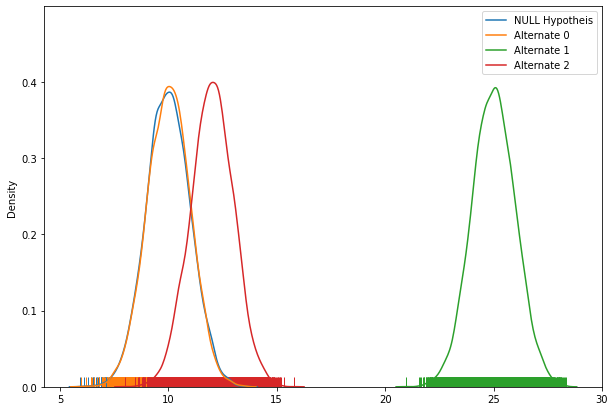

In [46]:
import seaborn as sns

plt.figure(figsize = (10, 7))

sns.distplot(x=dist_null, hist=False, rug=True, label = "NULL Hypotheis")
sns.distplot(x=dist_0, hist=False, rug=True, label = "Alternate 0")
sns.distplot(x=dist_1, hist=False, rug=True, label = "Alternate 1")
sns.distplot(x=dist_2, hist=False, rug=True, label = "Alternate 2")

plt.legend()
plt.show();

In [50]:
# Lets draw 100 samples from Alternate 0, 1, 2
samples_0_100 = np.random.choice(dist_0, 100)
samples_1_100 = np.random.choice(dist_1, 100)
samples_2_100 = np.random.choice(dist_2, 100)

samples_0_100[:5], samples_1_100[:5], samples_2_100[:5]

(array([ 7.6631723 ,  9.4025947 , 10.96850851,  9.6268436 , 11.57596291]),
 array([26.39149917, 27.18381973, 25.95837227, 24.11462264, 23.86643302]),
 array([11.45817219, 11.94547792, 13.88870512, 10.28352079, 12.13863141]))

In [51]:
## These random samples are from our alternate hypothesis 
## or in case of AB experiment they are from variant / feature

## Calculate sample means
samples_0_100_mean = np.mean(samples_0_100)
samples_1_100_mean = np.mean(samples_1_100)
samples_2_100_mean = np.mean(samples_2_100)

samples_0_100_mean, samples_1_100_mean, samples_2_100_mean

(9.97286620653595, 24.91316508314562, 11.922058708258202)

In [52]:
## Calculate sample std
samples_0_100_var = np.var(samples_0_100, ddof = 1) ## ddof = 1 will divide by N-1. Since we are calculating sample std
samples_1_100_var = np.var(samples_1_100, ddof = 1)
samples_2_100_var = np.var(samples_2_100, ddof = 1)

samples_0_100_std, samples_1_100_std, samples_2_100_std = np.sqrt(samples_0_100_var), np.sqrt(samples_1_100_var), np.sqrt(samples_2_100_var)

samples_0_100_std, samples_1_100_std, samples_2_100_std

(1.044476292243128, 1.1284614351745572, 0.9549947951961167)

In [71]:
t0 = np.abs(samples_0_100_mean - 10) / 1
t1 = np.abs(samples_1_100_mean - 10) / 1
t2 = np.abs(samples_2_100_mean - 10) / 1

t0, t1, t2


(0.027133793464049205, 14.913165083145621, 1.9220587082582021)

In [74]:
## so samples drawn from 0, 1 and 2 are t0, t1 and t2 std away from the mean of null

mean_null = 10
std_null = 1

pts_at_pos_std = mean_null + t0 * std_null, mean_null + t1 * std_null, mean_null + t2 * std_null
pts_at_neg_std = mean_null - t0 * std_null, mean_null - t1 * std_null, mean_null - t2 * std_null

pts_at_pos_std, pts_at_neg_std

((10.02713379346405, 24.91316508314562, 11.922058708258202),
 (9.97286620653595, -4.913165083145621, 8.077941291741798))

In [76]:
p_value_0 = len([pt for pt in dist_null if (pt > pts_at_pos_std[0] or pt < pts_at_neg_std[0])]) / len(dist_null)
p_value_1 = len([pt for pt in dist_null if (pt > pts_at_pos_std[1] or pt < pts_at_neg_std[1])]) / len(dist_null)
p_value_2 = len([pt for pt in dist_null if (pt > pts_at_pos_std[2] or pt < pts_at_neg_std[2])]) / len(dist_null)

p_value_0, p_value_1, p_value_2

(0.9799, 0.0, 0.0558)

```
We fail to reject null hypothesis in favor of NULL hypothesis
We reject null hypothesis in favor of Alternate hypothesis 
We fail to reject null hypothesis in favor of Alternate hypothesis
```

##
Now we observe in the 3rd value that p-value is just above 0.05, we might have gotten a p-value smaller than 0.05 and we could have rejected null hypothesis.

We could have taken more samples and gotten p-value smaller than 0.05 but that would be called p-hacking. We avoid this by Power analysis

Power analysis determines what sample size will ensure a high probability that we correctly reject the null hypothesis

### Power Analysis

When the distibutions overlap, we need high sample size to confidently reject the NULL hypothesis.

When there is less overlap, then we can confidently reject the null hypothesis with small sample size also

We need 2 things to determine sample size

1. Power: We can set it between 0 and 1. Typical value: 0.8
2. Significance level ($α$): We can set it between 0 and 1. Typical value: 0.05
3. Effect Size (d): Majors overlap between distributions. We can define it as:
$$d = \frac{\bar{x_1} - \bar{x_2}}{\sqrt{\frac{{s_1^{2} + s_2^{2}}}{2}}}$$

Where $\bar{x_i}$ are sample means and $s_i$ are sample standard deviations

In [78]:
### Now lets do power analysis for above

# First calcaulte effect size for alternate hypothesis 0, 1 and 2
# For this instead of using population mean and std of null hypothesis dist
# Lets estimate these by drawing 100 samples
samples_null_100 = np.random.choice(dist_null, 100)
mean_null_100 = np.mean(samples_null_100)
std_null_100 = np.sqrt(np.var(samples_null_100, ddof=1))

mean_null_100, std_null_100

(9.935250563847482, 1.0119016556984488)

In [81]:
def get_effect_size(mean1, mean2, std1, std2):
  num = np.abs(mean1 - mean2)
  den = np.sqrt((np.power(std1, 2) + np.power(std2,2)) / 2)

  return num / den

In [83]:
d0 = get_effect_size(mean_null_100, samples_0_100_mean, std_null_100, samples_0_100_std)
d1 = get_effect_size(mean_null_100, samples_1_100_mean, std_null_100, samples_1_100_std)
d2 = get_effect_size(mean_null_100, samples_2_100_mean, std_null_100, samples_2_100_std)

d0, d1, d2

(0.03657977772029741, 13.974969107493301, 2.0194017919684426)

## See this for details
https://www.statsmodels.org/dev/generated/statsmodels.stats.power.TTestIndPower.solve_power.html#statsmodels.stats.power.TTestIndPower.solve_power

In [84]:
## Now calculate sample size to get 0.8 Power
from statsmodels.stats.power import TTestIndPower

In [86]:
power_analysis = TTestIndPower()

sample_size0 = power_analysis.solve_power(effect_size = d0, alpha = 0.05, power = 0.8, alternative = 'two-sided')
sample_size1 = power_analysis.solve_power(effect_size = d1, alpha = 0.05, power = 0.8, alternative = 'two-sided')
sample_size2 = power_analysis.solve_power(effect_size = d2, alpha = 0.05, power = 0.8, alternative = 'two-sided')

sample_size0, sample_size1, sample_size2

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/power.py:415: ConvergenceWarning: 
Failed to converge on a solution.

  warnings.warn(convergence_doc, ConvergenceWarning)


(11732.485932813514, array([10.]), 5.01827030011594)